# Open Food Facts

In [1]:
import numpy as np
import matplotlib
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline

data = gl.SFrame.read_csv(url="/home/clebson/Documents/hekima/datasets/OpenFoodFacts/en.openfoodfacts.org.products.csv",
                       delimiter="\t",
                       header=True,
                       error_bad_lines=False,
                       comment_char='',
                       na_values="")
gl.canvas.set_target('ipynb')


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1489456835.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1489456835.log


Finished parsing file /home/clebson/Documents/hekima/datasets/OpenFoodFacts/en.openfoodfacts.org.products.csv

Parsing completed. Parsed 100 lines in 1.24292 secs.

This non-commercial license of GraphLab Create for academic use is assigned to clebsondm@gmail.com and will expire on December 05, 2017.
------------------------------------------------------

Unable to parse line "		villecomtal-sur-arros-gers-france	France		Belgique,France	en:belgium,en:france	Belgium,France	Lait entier, fruits : fraise (20 %), mangue (10 %), abricot (9,9 %), ananas (9,9 %), cerise (9,9 %), figue (9,4 %), sucre (7,2 % en moyenne), lait écrémé con..."

Unable to parse line "		villecomtal-sur-arros-gers-france,saint-just-chaleyssin-isere-france	Villecresnes,Villeurbanne,France	Dia,Sogeres	France	en:france	France	_Lait_ entier (59,5 %), _lait_ écrémé concentré ou en poudre, sucre (5,4 %), fruits (5 %) : fraise, framboise, f..."

Unable to parse line "		villecomtal-sur-arros-gers-france	France		Belgique,France, en:switzerland	en:belgium,en:france,en:switzerland	Belgium,France,Switzerland	Lait entier 69.5 %, fruits : fraise 10 %, mangue 10 %, abricot 9.9 %, kiwi 9.9 %, sucre 7.4 % en moyenne, lait écré..."

Unable to parse line "		villecomtal-sur-arros-gers-france	Veynes,France	SuperU	France	en:france	France	 _Lait_ entier (78%), fruits : mangue, abricot, cerise (6%), fraise (5,8%), lait écrémé concentré ou en poudre, sucre (4,3%), fructose (2,8% en moyenne), crème (lait), pu..."

Unable to parse line "		villecomtal-sur-arros-gers-france	Torcy 77,France	Carrefour	France	en:france	France	_Lait_ écrémé, _lait_ écrémé concentré ou en poudre, fruits : abricot (13%), fraise (10,8%), pêche (10%), cerise (8,7%) ananas (8,5%), citron (2%), cellules de ci..."

Unable to parse line "		villecomtal-sur-arros-gers-france	France		France	en:france	France	_Lait_ écrémé, fruits : fraise (12 %), cerise (10 %), framboise (10 %), myrtille (7 %), _lait_ écrémé concentré ou en poudre agent de charge : polydextrose (fibres) (dans les varié..."

Unable to parse line "		villecomtal-sur-arros-gers-france	Saint-Priest,France	Auchan	France	en:france	France	_Lait_ écrémé, _lait_ écrémé concentré ou en poudre, fruits: abricot (13 %), fraise (10,8 %), pêche (10 %), cerise (8,7 %), ananas (8,5 %), citron (2 %), cellule..."

Unable to parse line "		villecomtal-sur-arros-gers-france			France	en:france	France	_Lait_ entier (59,5 %), _lait_ écrémé concentré ou en poudre, sucre (8,2 % en moyenne), fruits : fruits rouges (mûre, fraise, framboise) (5 %), framboise (5 %), fraise (5 %), _crème_, épa..."

Unable to parse line "		villecomtal-sur-arros-gers-france	Villers Bocage 80260,France	Carrefour market	France	en:france	France	_Lait_ entier, rhubarbe (8 %), sucre (8 %), lait écrémé concentré ou en poudre, crème (_lait_), épaississants : E1442, E410,  correcteurs d'acidi..."

Unable to parse line "		villecomtal-sur-arros-gers-france	Villers Bocage 80260,France	Carrefour market	France	en:france	France	_Lait_ entier, ananas (8 %), sucre (7,1 %), _lait_ écrémé concentré ou en poudre, crème (_lait_), épaississants : E1422, E440, correcteurs d'acid..."

Read 22356 lines. Lines per second: 5188.68

Read 76560 lines. Lines per second: 7061.15

23 lines failed to parse correctly

Finished parsing file /home/clebson/Documents/hekima/datasets/OpenFoodFacts/en.openfoodfacts.org.products.csv

Parsing completed. Parsed 134731 lines in 13.3284 secs.


Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,int,str,int,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,int,str,str,str,int,str,str,int,str,str,str,str,str,str,str,str,str,str,str,str,str,int,str,float,float,str,str,str,str,str,str,str,str,str,str,str,str,str,str,float,float,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,int,float,float,float,str,str,str,str,str,str,float,str,float,float,str,str,str,float,float,str,float,str,str,str,str,float,str,str,str,str,float,str,str,str,str,str,int,str,float,str,float,str,str,str,str,str,str,str,str,str,str,str,str,float,str,str,str,str,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


# Let's see the most popular countries in this dataset
I'm considering the most popular country as the country that contributed the most with the data. First, let's filter the data:
* The attributes that identifies the countries are: countries (text), countries_tags (text) and countries_en (text). However, the attributes countries and countries_tags are prone to lead to errors, since most of the tuples are undefined. Therefore, I choose to maintain only the tuples with the attribute countries_en, since only 223 doesn't have this attribute. Thus, only tuples in which the countrie_en attribute were not None was maintained.
* As we can observe in the histogram bellow, the country that contributted the most was France, with almost 60% of the whole data collection.

In [2]:
data = data[data['countries_en'] != None]
data['countries_en'].show(view='Categorical')

# The most popular product in each Country
* Now let's see what are the most popular product for the first 5 countries and try to contrast with the most popular products in Brazil.

In [4]:
def build_dictionary(data, attribute):
    dictionary = dict()
    for value in data[attribute]:
        if(value in dictionary):
            dictionary[value] +=  1
        else:
            dictionary[value] = 1
    return dictionary

def sort_dictionary(dictionary, reverse_=False):
    return sorted(dictionary.items(), key=lambda x: x[1], reverse=reverse_)

france = data[data['countries_en'] == 'France']
switzerland = data[data['countries_en'] == 'Switzerland']
germany = data[data['countries_en'] == 'Germany']
united_kingdom = data[data['countries_en'] == 'United Kingdom']
spain = data[data['countries_en'] == 'Spain']
brazil = data[data['countries_en'] == 'Brazil']

france_product = build_dictionary(france, 'product_name')
afrance = np.asarray(sort_dictionary(france_product, True))[1:10,:]

switzerland_product = build_dictionary(switzerland, 'product_name')
aswitzerland = np.asarray(sort_dictionary(switzerland_product, True))[1:10,:]

germany_product = build_dictionary(germany, 'product_name')
agermany = np.asarray(sort_dictionary(germany_product, True))[1:10,:]

united_kingdom_product = build_dictionary(united_kingdom, 'product_name')
auk = np.asarray(sort_dictionary(united_kingdom_product, True))[1:10,:]

spain_product = build_dictionary(spain, 'product_name')
aspain = np.asarray(sort_dictionary(spain_product, True))[1:10,:]

brazil_product = build_dictionary(brazil, 'product_name')
abrazil = np.asarray(sort_dictionary(brazil_product, True))[1:10, :]

# Remove special characters.
for i in xrange(len(aspain)):
    aspain[i][0] = aspain[i][0].replace("&quot", "").replace("\xc3", "").replace("\xa1n", "").replace("\xb3", "")
    aspain[i][0] = aspain[i][0].replace("\xad", "").replace(" ;", "; ");

for i in xrange(len(abrazil)):
    abrazil[i][0] = abrazil[i][0].replace("\xc3\xa3", "a")

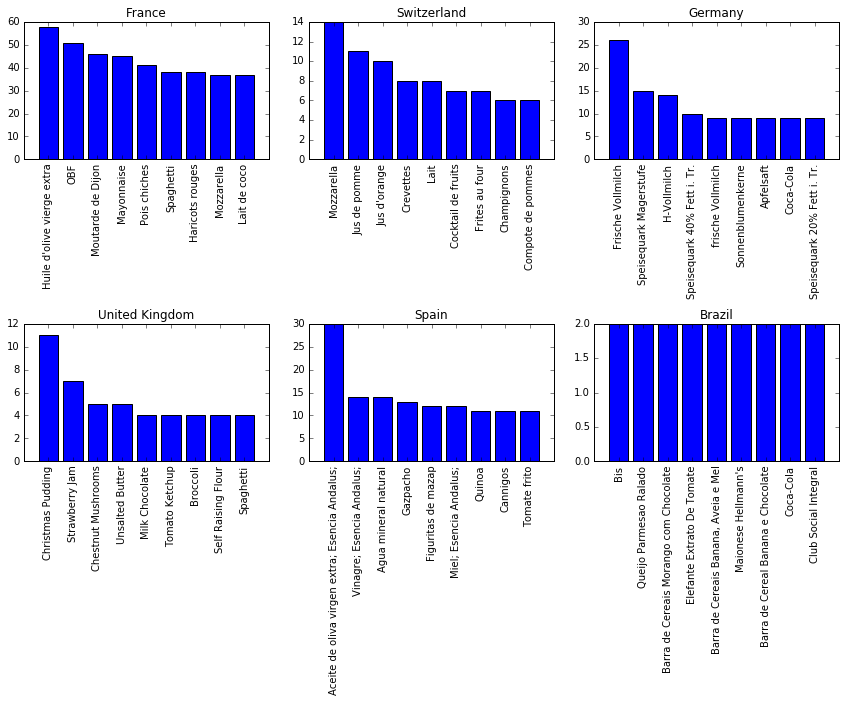

In [5]:
f, axarr = plt.subplots(nrows=2, ncols=3)

def plot_bar_chart(line, col, array, name):
    axarr[line][col].bar(range(len(array[:,1])), array[:,1], align="center")
    plt.sca(axarr[line][col])
    plt.xticks(range(len(afrance[:,1])), array[:, 0], color='black', rotation='vertical')
    axarr[line][col].set_title(name)

plot_bar_chart(0, 0, afrance, "France")
plot_bar_chart(0, 1, aswitzerland, "Switzerland")
plot_bar_chart(0, 2, agermany, "Germany")
plot_bar_chart(1, 0, auk, "United Kingdom")
plot_bar_chart(1, 1, aspain, "Spain")
plot_bar_chart(1, 2, abrazil, "Brazil")
plt.tight_layout(pad = -20, h_pad = 1 , w_pad=2)

## Looking at the individual products for each country in the chart above, we can verify that the 5 most important products in the data collection for the countries are:
* Frace
    * Olive Oil
    * OBF: All sorts of products for skin
    * Moustard
    * Mayonnaise
    * Pois chiches
* Switzerland
    * Mozzarella
    * Jus de pomme
    * Jus d'orange
    * Crevettes
    * Lait
* Germany
    * Frische Vollmilch
    * Speisequark Magerstufe
    * H-Vollmilch
    * Speisequark 40% Fett i. Tr.
    * frische Vollmilch'
* UK
    * Christmas Pudding
    * Strawberry Jam
    * Chestnut Mushrooms
    * Unsalted Butter
    * Milk Chocolate
* Spain
    * Aceite de oliva virgen extra
    * Esencia Andalus;
    * Vinagre; Esencia Andalus;
    * Agua mineral natural
    * Gazpacho
    * Figuritas de mazap'
* Brazil
    * Bis
    * Queijo Parmesão Ralado
    * Barra de Cereais Morango com Chocolate
    * Elefante Extrato De Tomate
    * Barra de Cereais Banana, Aveia e Mel

## As we can observe, the second most popular product OBF for the country France is not Food Related. As we can see in the images retrieved from the urls in the dataset, all of are skin related products.

In [ ]:
[x for x in france[france['product_name']=="OBF"]["image_url"][0:3]]

<img src= 'http://en.openfoodfacts.org/images/products/200/000/000/6642/front.5.400.jpg',width=200,height=200>
<img src= 'http://en.openfoodfacts.org/images/products/20277246/front.3.400.jpg', width=200,height=200>
<img src= 'http://en.openfoodfacts.org/images/products/20456887/front.3.400.jpg', width=200,height=200>